In [77]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1951_bacteria_4882.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1949_bacteria_4880.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/per

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.layers import Input, Conv2D, Dropout, Flatten, Activation, MaxPooling2D, Dense
from tensorflow.keras.layers import GlobalAveragePooling2D, BatchNormalization

from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Add, ZeroPadding2D
from tensorflow.keras.callbacks import TensorBoard

In [80]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [81]:
train = get_training_data('../input/chest-xray-pneumonia/chest_xray/chest_xray/train')
test = get_training_data('../input/chest-xray-pneumonia/chest_xray/chest_xray/test')
val = get_training_data('../input/chest-xray-pneumonia/chest_xray/chest_xray/val')

OpenCV(4.5.4) /tmp/pip-req-build-jpmv6t9_/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.4) /tmp/pip-req-build-jpmv6t9_/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  from ipykernel import kernelapp as app


OpenCV(4.5.4) /tmp/pip-req-build-jpmv6t9_/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.4) /tmp/pip-req-build-jpmv6t9_/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



In [82]:
print('train:', len(train), '/', 'test:', len(test), '/', 'val:', len(val), '/', 'sum:', len(train) + len(test) + len(val))

train: 5216 / test: 624 / val: 16 / sum: 5856


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

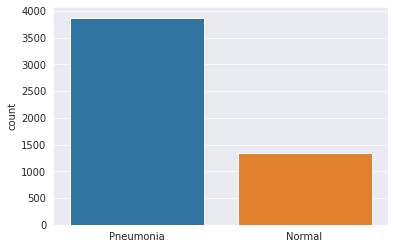

In [83]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("Pneumonia")
    else:
        l.append("Normal")
sns.set_style('darkgrid')
sns.countplot(l)     

In [84]:
print(l.count("Pneumonia"), l.count("Normal"))

3875 1341


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

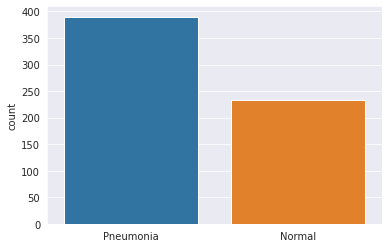

In [85]:
ll = []
for i in test:
    if(i[1] == 0):
        ll.append("Pneumonia")
    else:
        ll.append("Normal")
sns.set_style('darkgrid')
sns.countplot(ll)  

In [86]:
print(ll.count("Pneumonia"), ll.count("Normal"))

390 234


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

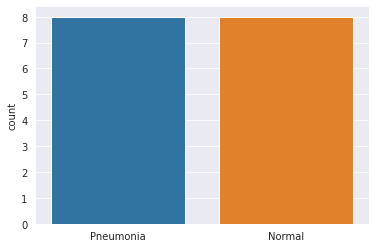

In [87]:
lll = []
for i in val:
    if(i[1] == 0):
        lll.append("Pneumonia")
    else:
        lll.append("Normal")
sns.set_style('darkgrid')
sns.countplot(lll) 

In [88]:
print(lll.count("Pneumonia"), lll.count("Normal"))

8 8


Text(0.5, 1.0, 'NORMAL')

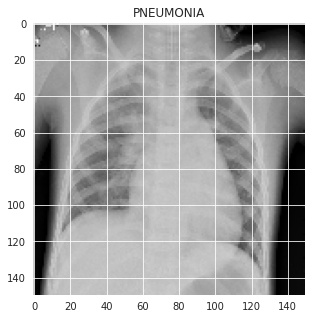

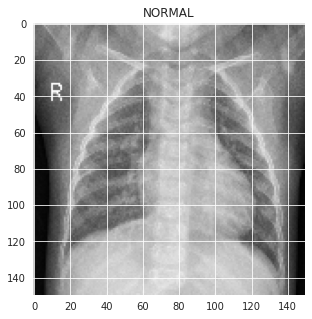

In [89]:
plt.figure(figsize = (5,5))
plt.imshow(train[500][0], cmap='gray')
plt.title(labels[train[500][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-2][0], cmap='gray')
plt.title(labels[train[-2][1]])

Text(0.5, 1.0, 'NORMAL')

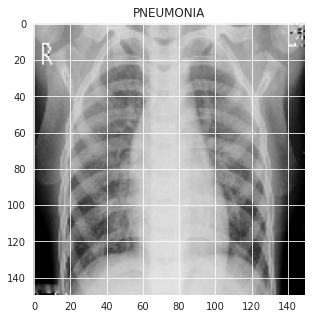

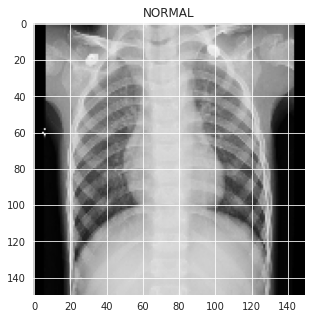

In [90]:
plt.figure(figsize = (5,5))
plt.imshow(test[0][0], cmap='gray')
plt.title(labels[val[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(test[-2][0], cmap='gray')
plt.title(labels[train[-2][1]])

Text(0.5, 1.0, 'NORMAL')

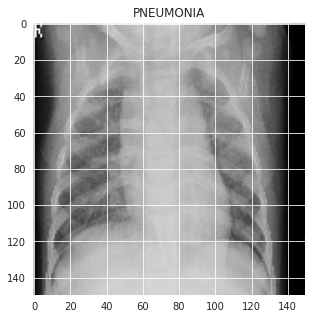

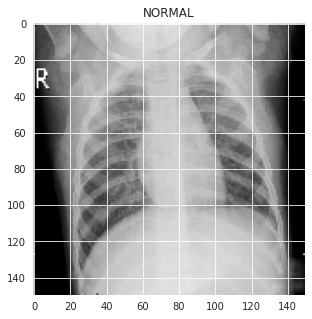

In [91]:
plt.figure(figsize = (5,5))
plt.imshow(val[0][0], cmap='gray')
plt.title(labels[val[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(val[-2][0], cmap='gray')
plt.title(labels[train[-2][1]])

In [92]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

In [93]:
# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

In [94]:
# resize data for deep learning 
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [95]:
# With data augmentation to prevent overfitting and handling the imbalance in dataset

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=True)  # randomly flip images


datagen.fit(x_train)

In [96]:
def identity_block(input_tensor, filters):
    filter1, filter2, filter3 = filters
    
    x = Conv2D(filters=filter1, kernel_size=(1, 1), padding="same", kernel_initializer="he_normal")(input_tensor)
    x = BatchNormalization(axis=3)(x)
    x = Activation("relu")(x)
    
    x = Conv2D(filters=filter2, kernel_size=(3, 3), padding="same", kernel_initializer="he_normal")(x)
    x = BatchNormalization(axis=3)(x)
    x = Activation("relu")(x)
    
    x = Conv2D(filters=filter3, kernel_size=(1, 1), padding="same", kernel_initializer="he_normal")(x)
    x = BatchNormalization(axis=3)(x)

    x = Add()([input_tensor, x])
    output = Activation("relu")(x)
    
    return output

In [97]:
def convolutional_block(input_tensor, filters, strides=(2,2)):
    filter1, filter2, filter3 = filters
    
    x = Conv2D(filters=filter1, kernel_size=(1, 1), padding="same", strides = strides, kernel_initializer="he_normal")(input_tensor)
    x = BatchNormalization(axis=3)(x)
    x = Activation("relu")(x)
    
    x = Conv2D(filters=filter2, kernel_size=(3, 3), padding="same", kernel_initializer="he_normal")(x)
    x = BatchNormalization(axis=3)(x)
    x = Activation("relu")(x)
    
    x = Conv2D(filters=filter3, kernel_size=(1, 1), padding="same", kernel_initializer="he_normal")(x)
    x = BatchNormalization(axis=3)(x)

    shortcut = Conv2D(filters=filter3, kernel_size=(1, 1), padding="same", strides=strides, kernel_initializer="he_normal")(input_tensor)
    shortcut = BatchNormalization(axis=3)(shortcut)
    
    x = Add()([x, shortcut])
    output = Activation("relu")(x)
    
    return output

In [98]:
def build_resnet50():
    tf.keras.backend.clear_session()
    input_tensor = Input(shape=(150, 150, 1))

    x = ZeroPadding2D(padding=(3,3))(input_tensor)
    x = Conv2D(filters=64, kernel_size=(7,7), padding="valid", strides=(2,2))(x)
    x = BatchNormalization(axis=3)(x)
    x = Activation("relu")(x)

    x = ZeroPadding2D(padding=(1,1))(x)
    x = MaxPooling2D(pool_size=(3,3), strides=(2,2))(x)

    x = convolutional_block(x, [64, 64, 256], strides=(1, 1))
    x = identity_block(x, [64, 64, 256])
    x = identity_block(x, [64, 64, 256])

    x = convolutional_block(x, [128, 128, 512], strides=(2, 2))
    x = identity_block(x, [128, 128, 512])
    x = identity_block(x, [128, 128, 512])
    x = identity_block(x, [128, 128, 512])

    x = convolutional_block(x, [256, 256, 1024], strides=(2, 2))
    x = identity_block(x, [256, 256, 1024])
    x = identity_block(x, [256, 256, 1024])
    x = identity_block(x, [256, 256, 1024])
    x = identity_block(x, [256, 256, 1024])
    x = identity_block(x, [256, 256, 1024])

    x = convolutional_block(x, [512, 512, 2048], strides=(2, 2))
    x = identity_block(x, [512, 512, 2048])
    x = identity_block(x, [512, 512, 2048])

    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    x = Dense(200, activation="relu")(x)
    x = Dropout(0.5)(x)
    output = Dense(1, activation="sigmoid")(x)

    model = Model(inputs=input_tensor, outputs= output)
    model.compile(optimizer=SGD(0.01, momentum=0.9), loss="binary_crossentropy", metrics=["accuracy"])
    
    return model

model = build_resnet50()
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 1) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 156, 156, 1)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 75, 75, 64)   3200        zero_padding2d[0][0]             
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 75, 75, 64)   256         conv2d[0][0]                     
______________________________________________________________________________________________

In [99]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 4, verbose=1,factor=0.3, min_lr=0.0000001)

In [100]:
history = model.fit(datagen.flow(x_train,y_train, batch_size = 32) ,epochs = 25 , validation_data = datagen.flow(x_val, y_val) ,callbacks = [learning_rate_reduction])

Epoch 1/25
163/163 [==============================] - 23s 112ms/step - loss: 0.5167 - accuracy: 0.7638 - val_loss: 0.6919 - val_accuracy: 0.5625
Epoch 2/25
163/163 [==============================] - 17s 103ms/step - loss: 0.3126 - accuracy: 0.8593 - val_loss: 0.7000 - val_accuracy: 0.6875
Epoch 3/25
163/163 [==============================] - 17s 106ms/step - loss: 0.2846 - accuracy: 0.8827 - val_loss: 0.7110 - val_accuracy: 0.8125
Epoch 4/25
163/163 [==============================] - 17s 103ms/step - loss: 0.2805 - accuracy: 0.8898 - val_loss: 0.9128 - val_accuracy: 0.6250
Epoch 5/25
163/163 [==============================] - 17s 106ms/step - loss: 0.2587 - accuracy: 0.8930 - val_loss: 1.0735 - val_accuracy: 0.5625
Epoch 6/25
163/163 [==============================] - 17s 103ms/step - loss: 0.2489 - accuracy: 0.8986 - val_loss: 1.2637 - val_accuracy: 0.6875
Epoch 7/25
163/163 [==============================] - 17s 106ms/step - loss: 0.2482 - accuracy: 0.9038 - val_loss: 1.7112 - val_ac

In [101]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

2023-01-13 02:34:34.460582: W tensorflow/core/framework/op_kernel.cc:1680] Invalid argument: ValueError: callback pyfunc_5 is not found
Traceback (most recent call last):

  File "/opt/conda/lib/python3.7/site-packages/tensorflow/python/ops/script_ops.py", line 238, in __call__
    raise ValueError("callback %s is not found" % token)

ValueError: callback pyfunc_5 is not found


2023-01-13 02:34:34.461225: W tensorflow/core/kernels/data/generator_dataset_op.cc:107] Error occurred when finalizing GeneratorDataset iterator: Invalid argument: ValueError: callback pyfunc_5 is not found
Traceback (most recent call last):

  File "/opt/conda/lib/python3.7/site-packages/tensorflow/python/ops/script_ops.py", line 238, in __call__
    raise ValueError("callback %s is not found" % token)

ValueError: callback pyfunc_5 is not found


	 [[{{node PyFunc}}]]


20/20 [==============================] - 62s 35ms/step - loss: 0.3466 - accuracy: 0.9054
Loss of the model is -  0.346641480922699
20/20 [==============================] - 1s 36ms/step - loss: 0.3466 - accuracy: 0.9054
Accuracy of the model is -  90.54487347602844 %


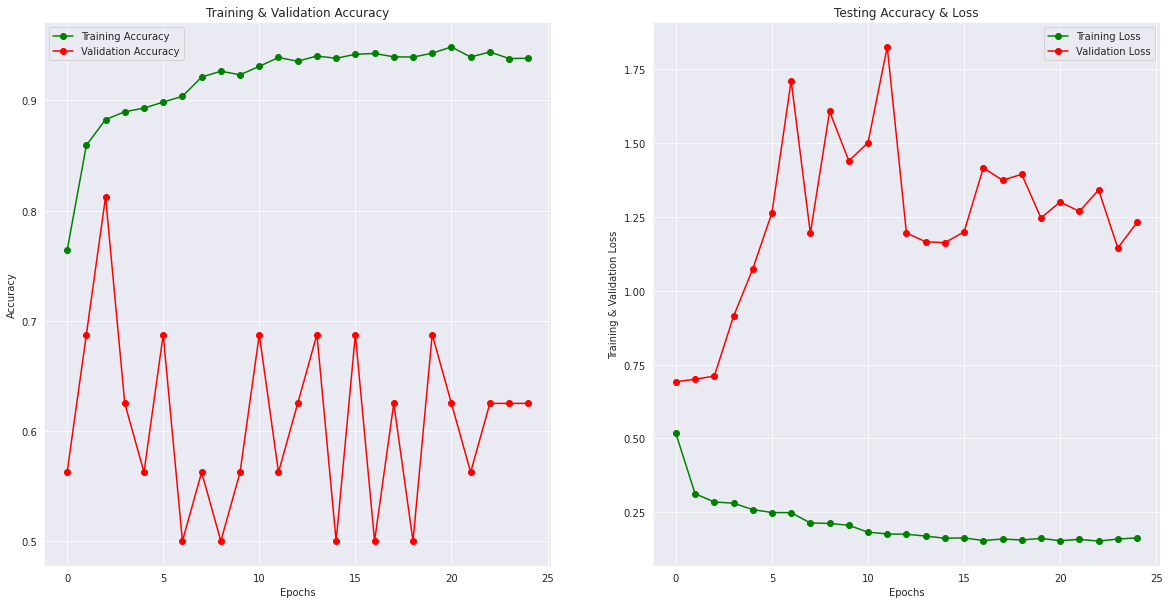

In [103]:
epochs = [i for i in range(25)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()